In [3]:

# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 
  
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
#from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

mushroom_train = pd.read_csv('train.csv')

In [4]:
##mushroom_train = pd.read_csv('train.csv')
mushroom_train.shape

(4907, 24)

In [6]:
mushroom_train.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
0,1,p,x,s,n,t,p,f,c,n,...,s,w,w,p,w,o,p,k,s,u
1,2,e,x,s,y,t,a,f,c,b,...,s,w,w,p,w,o,p,n,n,g
2,5,e,x,s,g,f,n,f,w,b,...,s,w,w,p,w,o,e,n,a,g
3,9,p,x,y,w,t,p,f,c,n,...,s,w,w,p,w,o,p,k,v,g
4,12,e,x,y,y,t,a,f,c,b,...,s,w,w,p,w,o,p,k,s,m


In [7]:
mushroom_train = mushroom_train.iloc[:,1:24]


In [8]:
mushroom_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
count,4907,4907,4907,4907,4907,4907,4907,4907,4907,4907,...,4907,4907,4907,4907,4907,4907,4907,4907,4907,4907
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,2535,2198,1998,1372,2862,2148,4772,4135,3419,1040,...,2966,2651,2595,4907,4781,4506,2411,1449,2440,1938


In [9]:
mushroom_train.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
dtype: int64

In [10]:
mushroom_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23'],
      dtype='object')

In [11]:
##making values 
 # Seperating the target variable 
X = mushroom_train.values[:,1:24] 
Y = mushroom_train.values[:,0] 

In [22]:
 # Creating the classifier object 
#clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5) 

In [29]:
#clf_gini.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [34]:
mushroom_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23'],
      dtype='object')

In [12]:
mushroom_train.V3.value_counts()

y    1998
s    1481
f    1426
g       2
Name: V3, dtype: int64

In [13]:
mushroom_train = mushroom_train.rename(columns={'V1': 'target'})


In [14]:
mushroom_train.target

0       p
1       e
2       e
3       p
4       e
5       e
6       e
7       e
8       p
9       p
10      e
11      p
12      e
13      e
14      p
15      e
16      p
17      e
18      e
19      e
20      p
21      e
22      e
23      e
24      e
25      p
26      e
27      e
28      e
29      e
       ..
4877    e
4878    p
4879    p
4880    e
4881    e
4882    e
4883    p
4884    p
4885    p
4886    p
4887    e
4888    e
4889    p
4890    p
4891    e
4892    e
4893    e
4894    e
4895    e
4896    p
4897    e
4898    e
4899    e
4900    p
4901    p
4902    p
4903    p
4904    e
4905    e
4906    p
Name: target, Length: 4907, dtype: object

In [15]:
def entropy(target_col):

    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [16]:
total_entropy = entropy(mushroom_train['target'])

In [17]:
total_entropy

0.9992039001672588

In [26]:

def Info(data,split_attribute_name,target_name):
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    #Information_Gain = total_entropy - Weighted_Entropy
    return Weighted_Entropy

In [27]:
V2g = Info(mushroom_train,'V2','target')
V3g = Info(mushroom_train,'V3','target')
V4g = Info(mushroom_train,'V4','target')
V5g = Info(mushroom_train,'V5','target')
V6g = Info(mushroom_train,'V6','target')
V7g = Info(mushroom_train,'V7','target')
V8g = Info(mushroom_train,'V8','target')
V9g = Info(mushroom_train,'V9','target')
V10g = Info(mushroom_train,'V10','target')
V11g = Info(mushroom_train,'V11','target')
V12g = Info(mushroom_train,'V12','target')
V13g = Info(mushroom_train,'V13','target')
V14g = Info(mushroom_train,'V14','target')
V15g = Info(mushroom_train,'V15','target')
V16g = Info(mushroom_train,'V16','target')
V17g = Info(mushroom_train,'V17','target')
V18g = Info(mushroom_train,'V18','target')
V19g = Info(mushroom_train,'V19','target')
V20g = Info(mushroom_train,'V20','target')
V21g = Info(mushroom_train,'V21','target')
V22g = Info(mushroom_train,'V22','target')
V23g = Info(mushroom_train,'V23','target')


In [28]:
f = {
    "V2":V2g,
    "V3":V3g,
    "V4":V4g,
    "V5":V5g,
    "V6":V6g,
    "V7":V7g,
    "V8":V8g,
    "V9":V9g,
    "V10":V10g,
    "V11":V11g,
    "V12":V12g,
    "V13":V13g,
    "V14":V14g,
    "V15":V15g,
    "V16":V16g,
    "V17":V17g,
    "V18":V18g,
    "V19":V19g,
    "V20":V20g,
    "V21":V21g,
    "V22":V22g,
    "V23":V23g
}


In [29]:
f

{'V2': 0.9481819820508585,
 'V3': 0.9706856236402175,
 'V4': 0.9598048075295792,
 'V5': 0.8020720866376663,
 'V6': 0.0936764080878342,
 'V7': 0.985614556440912,
 'V8': 0.9008391793623238,
 'V9': 0.7652545477214082,
 'V10': 0.5796326410530734,
 'V11': 0.9906408439717118,
 'V12': 0.9000200155271751,
 'V13': 0.7123344009353176,
 'V14': 0.7251234494718017,
 'V15': 0.740183055733386,
 'V16': 0.7539623818104584,
 'V17': 0.9992039001672588,
 'V18': 0.9742544742655131,
 'V19': 0.9584587120563235,
 'V20': 0.6705382797330776,
 'V21': 0.5133214709760068,
 'V22': 0.8070132010258532,
 'V23': 0.8422474144519138}

In [96]:
min(f, key=f.get) ###the best attribute is V6 using entropy

'V6'

In [58]:
mushroom_train = pd.DataFrame(mushroom_train)

In [53]:
gini_index(mushroom_train.target)

0.49944828715265543

In [30]:
def gini_index(target_col):

    elements,counts = np.unique(target_col,return_counts = True)
    gini = 1 - np.sum([(counts[i]/np.sum(counts))*(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return gini

In [62]:
gini_index(V2)

0.6324059958679575

In [61]:
V2 = mushroom_train['V2']

In [70]:
target = mushroom_train['target']

In [31]:
def Info(data,split_attribute_name,target_name):
    #Calculate the entropy of the total dataset
    total_gini = gini_index(target_name)

    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    ##weighted gini index
    Weighted_gini = np.sum([(counts[i]/np.sum(counts))*gini_index(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
     
    #Calculate the information gain
    #Information_Gain = total_gini - Weighted_gini
    return Weighted_gini

In [64]:
V3 = Info(mushroom_train,split_attribute_name = 'V3',target_name='target')

In [65]:
V3

0.4800965134909827

In [32]:
V2 = Info(mushroom_train,split_attribute_name = 'V2',target_name='target')
V3 = Info(mushroom_train,split_attribute_name = 'V3',target_name='target')
V4 = Info(mushroom_train,split_attribute_name = 'V4',target_name='target')
V5 = Info(mushroom_train,split_attribute_name = 'V5',target_name='target')
V6 = Info(mushroom_train,split_attribute_name = 'V6',target_name='target')
V7 = Info(mushroom_train,split_attribute_name = 'V7',target_name='target')
V8 = Info(mushroom_train,split_attribute_name = 'V8',target_name='target')
V9 = Info(mushroom_train,split_attribute_name = 'V9',target_name='target')
V10 = Info(mushroom_train,split_attribute_name = 'V10',target_name='target')
V11 = Info(mushroom_train,split_attribute_name = 'V11',target_name='target')
V12 = Info(mushroom_train,split_attribute_name = 'V12',target_name='target')
V13 = Info(mushroom_train,split_attribute_name = 'V13',target_name='target')
V14 = Info(mushroom_train,split_attribute_name = 'V14',target_name='target')
V15 = Info(mushroom_train,split_attribute_name = 'V15',target_name='target')
V16 = Info(mushroom_train,split_attribute_name = 'V16',target_name='target')
V17 = Info(mushroom_train,split_attribute_name = 'V17',target_name='target')
V18 = Info(mushroom_train,split_attribute_name = 'V18',target_name='target')
V19 = Info(mushroom_train,split_attribute_name = 'V19', target_name='target')
V20 = Info(mushroom_train,split_attribute_name = 'V20',target_name='target')
V21 = Info(mushroom_train,split_attribute_name = 'V21',target_name='target')
V22 = Info(mushroom_train,split_attribute_name = 'V22',target_name='target')
V23 = Info(mushroom_train,split_attribute_name = 'V23',target_name='target')

In [33]:
gini = {
    "V2":V2,
    "V3":V3,
    "V4":V4,
    "V5":V5,
    "V6":V6,
    "V7":V7,
    "V8":V8,
    "V9":V9,
    "V10":V10,
    "V11":V11,
    "V12":V12,
    "V13":V13,
    "V14":V14,
    "V15":V15,
    "V16":V16,
    "V17":V17,
    "V18":V18,
    "V19":V19,
    "V20":V20,
    "V21":V21,
    "V22":V22,
    "V23":V23
}


In [34]:
gini

{'V2': 0.4681902365856444,
 'V3': 0.4800965134909827,
 'V4': 0.4732295149922768,
 'V5': 0.3708173658676361,
 'V6': 0.028742240686071896,
 'V7': 0.49129156570065435,
 'V8': 0.44033063996991456,
 'V9': 0.3523441387568093,
 'V10': 0.26657374009468215,
 'V11': 0.4935281290258776,
 'V12': 0.43968496422168846,
 'V13': 0.3248754916374601,
 'V14': 0.33264665139723,
 'V15': 0.3595644142997843,
 'V16': 0.36534581041892467,
 'V17': 0.49944828715265543,
 'V18': 0.4871141188882509,
 'V19': 0.47506888795871177,
 'V20': 0.31141968590197694,
 'V21': 0.21469095504935756,
 'V22': 0.3871157557657242,
 'V23': 0.40240311452479166}

In [69]:
min(gini, key=gini.get) ###the best attribute is V6 using gain-  it has minimum gain

'V6'

In [36]:
##Accuracy - Classification error:
def accuracy(target_col):

    elements,counts = np.unique(target_col,return_counts = True)
    acc = 1 - np.max([(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return acc

In [37]:
V2a = accuracy(mushroom_train['V2'])
V2a

0.5520684736091298

In [38]:
V2a = accuracy(mushroom_train['V2'])
V3a = accuracy(mushroom_train['V3'])
V4a = accuracy(mushroom_train['V4'])
V5a = accuracy(mushroom_train['V5'])
V6a = accuracy(mushroom_train['V6'])
V7a = accuracy(mushroom_train['V7'])
V8a = accuracy(mushroom_train['V8'])
V9a = accuracy(mushroom_train['V9'])
V10a = accuracy(mushroom_train['V10'])
V11a = accuracy(mushroom_train['V11'])
V12a = accuracy(mushroom_train['V12'])
V13a = accuracy(mushroom_train['V13'])
V14a = accuracy(mushroom_train['V14'])
V15a = accuracy(mushroom_train['V15'])
V16a = accuracy(mushroom_train['V16'])
V17a = accuracy(mushroom_train['V17'])
V18a = accuracy(mushroom_train['V18'])
V19a = accuracy(mushroom_train['V19'])
V20a = accuracy(mushroom_train['V20'])
V21a = accuracy(mushroom_train['V21'])
V22a = accuracy(mushroom_train['V22'])
V23a = accuracy(mushroom_train['V23'])

In [39]:
Accuracy = {
    "V2":V2a,
    "V3":V3a,
    "V4":V4a,
    "V5":V5a,
    "V6":V6a,
    "V7":V7a,
    "V8":V8a,
    "V9":V9a,
    "V10":V10a,
    "V11":V11a,
    "V12":V12a,
    "V13":V13a,
    "V14":V14a,
    "V15":V15a,
    "V16":V16a,
    "V17":V17a,
    "V18":V18a,
    "V19":V19a,
    "V20":V20a,
    "V21":V21a,
    "V22":V22a,
    "V23":V23a
}


In [40]:
Accuracy

{'V2': 0.5520684736091298,
 'V3': 0.5928265742816385,
 'V4': 0.7203994293865905,
 'V5': 0.41675157937640106,
 'V6': 0.5622579987772569,
 'V7': 0.02751171795394336,
 'V8': 0.1573262685958834,
 'V9': 0.30324026900346446,
 'V10': 0.788057876502955,
 'V11': 0.432851029142042,
 'V12': 0.2215202771550846,
 'V13': 0.3686570205828409,
 'V14': 0.3955573670266965,
 'V15': 0.45975137558589774,
 'V16': 0.47116364377420017,
 'V17': 0.0,
 'V18': 0.025677603423680417,
 'V19': 0.08171999184837986,
 'V20': 0.5086610963929081,
 'V21': 0.7047075606276747,
 'V22': 0.5027511717953943,
 'V23': 0.6050540044833911}

In [80]:
max(Accuracy, key=Accuracy.get) ###the best attribute is V10 using accuracy-  it has minimum error

'V10'

In [41]:
acc = list(Accuracy.values())

In [42]:
f1 = list(f.values())

In [45]:
gin = list(gini.values())
ent = list(f.values())

In [43]:
for i in range(len(f1)):
    f1[i] = 1 - f1[i] 

In [44]:
f1

[0.05181801794914154,
 0.029314376359782512,
 0.040195192470420804,
 0.19792791336233373,
 0.9063235919121658,
 0.014385443559087996,
 0.09916082063767617,
 0.23474545227859178,
 0.42036735894692656,
 0.009359156028288185,
 0.09997998447282486,
 0.28766559906468236,
 0.27487655052819826,
 0.25981694426661395,
 0.24603761818954162,
 0.0007960998327412039,
 0.02574552573448685,
 0.04154128794367651,
 0.32946172026692244,
 0.4866785290239932,
 0.19298679897414683,
 0.15775258554808624]

In [101]:

df_final = pd.DataFrame()
df_final['entropy'] = f1
df_final['accuracy'] = acc

In [103]:
df_final = df_final.reset_index()

In [104]:
df_final

,index,entropy,accuracy
0,0,0.051818,0.552068
1,1,0.029314,0.592827
2,2,0.040195,0.720399
3,3,0.197928,0.416752
4,4,0.906324,0.562258
5,5,0.014385,0.027512
6,6,0.099161,0.157326
7,7,0.234745,0.303240
8,8,0.420367,0.788058
9,9,0.009359,0.432851


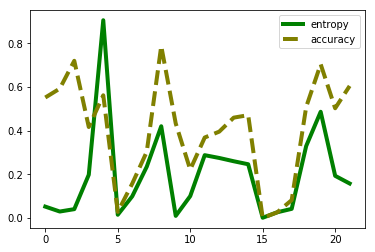

In [105]:
plt.plot( 'index', 'entropy', data=df_final , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'index', 'accuracy', data=df_final, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [88]:
import matplotlib.pyplot as plt

In [18]:
##Information gain due to each feature

def Info(data,split_attribute_name,target_name):
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [21]:
V2i = Info(mushroom_train,'V2','target')
V3i = Info(mushroom_train,'V3','target')
V4i = Info(mushroom_train,'V4','target')
V5i = Info(mushroom_train,'V5','target')
V6i = Info(mushroom_train,'V6','target')
V7i = Info(mushroom_train,'V7','target')
V8i = Info(mushroom_train,'V8','target')
V9i = Info(mushroom_train,'V9','target')
V10i = Info(mushroom_train,'V10','target')
V11i = Info(mushroom_train,'V11','target')
V12i = Info(mushroom_train,'V12','target')
V13i= Info(mushroom_train,'V13','target')
V14i = Info(mushroom_train,'V14','target')
V15i = Info(mushroom_train,'V15','target')
V16i = Info(mushroom_train,'V16','target')
V17i = Info(mushroom_train,'V17','target')
V18i = Info(mushroom_train,'V18','target')
V19i = Info(mushroom_train,'V19','target')
V20i = Info(mushroom_train,'V20','target')
V21i = Info(mushroom_train,'V21','target')
V22i = Info(mushroom_train,'V22','target')
V23i = Info(mushroom_train,'V23','target')


In [22]:
infomation_gain = {
    "V2":V2i,
    "V3":V3i,
    "V4":V4i,
    "V5":V5i,
    "V6":V6i,
    "V7":V7i,
    "V8":V8i,
    "V9":V9i,
    "V10":V10i,
    "V11":V11i,
    "V12":V12i,
    "V13":V13i,
    "V14":V14i,
    "V15":V15i,
    "V16":V16i,
    "V17":V17i,
    "V18":V18i,
    "V19":V19i,
    "V20":V20i,
    "V21":V21i,
    "V22":V22i,
    "V23":V23i
}


In [23]:
info = list(infomation_gain.values())

Index(['target', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23'],
      dtype='object')

In [48]:
feature = ['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23']

In [49]:
df_table = pd.DataFrame()
df_table['information gain'] = info
df_table['accuracy'] = acc
df_table['Gini index'] = gin
df_table['feature'] = feature
df_table['1 - Entropy'] = f1

In [50]:
df_table

,information gain,accuracy,Gini index,feature,1 - Entropy
0,0.051022,0.552068,0.468190,V2,0.051818
1,0.028518,0.592827,0.480097,V3,0.029314
2,0.039399,0.720399,0.473230,V4,0.040195
3,0.197132,0.416752,0.370817,V5,0.197928
4,0.905527,0.562258,0.028742,V6,0.906324
5,0.013589,0.027512,0.491292,V7,0.014385
6,0.098365,0.157326,0.440331,V8,0.099161
7,0.233949,0.303240,0.352344,V9,0.234745
8,0.419571,0.788058,0.266574,V10,0.420367
9,0.008563,0.432851,0.493528,V11,0.009359


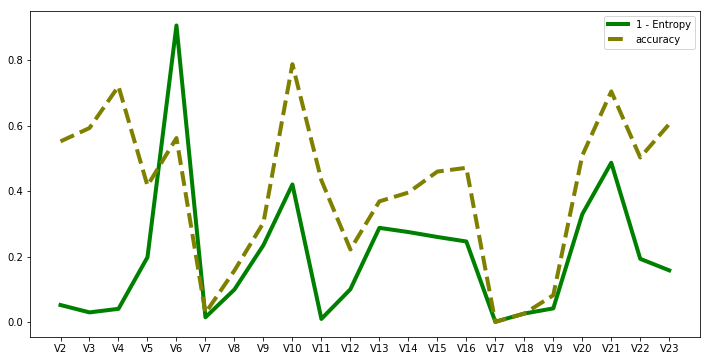

In [103]:
plt.figure(figsize=(12,6))
plt.plot( 'feature', '1 - Entropy', data=df_table , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'feature', 'accuracy', data=df_table, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [ ]:
Question -  P3  - creating Naive Bayes and Decision Tree classifier

In [127]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushroom_train.columns:
    mushroom_train[col] = labelencoder.fit_transform(mushroom_train[col])

In [51]:
##creating dummy variables
mushroom_train= mushroom_train.iloc[:,1:]


#X_test=pd.get_dummies(X_test,columns=X_test.columns,drop_first=True)

In [52]:
predictors=pd.get_dummies(mushroom_train,columns=mushroom_train.columns,drop_first=True)

In [167]:
#predictors = predictors.iloc[:,1:]

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB



In [57]:
mushroom_test = pd.read_csv('test.csv')

mushroom_test= mushroom_test.iloc[:,1:]
mushroom_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
0,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
1,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
2,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
3,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
4,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m


In [58]:
y_test = mushroom_test.iloc[:,0]
mushroom_test = mushroom_test.iloc[:,1:]

In [59]:
predictors_test=pd.get_dummies(mushroom_test,columns=mushroom_test.columns,drop_first=True)

In [68]:
X_test = predictors_test

In [76]:
X = predictors

In [80]:
Y.shape

(4907,)

In [81]:
score_train_NB = []
score_test_NB = []
factor = []
for i in range(50):
    clf = MultinomialNB(alpha=i, class_prior=None, fit_prior=True)
    clf.fit(X,Y)
    y_pred_NB = clf.predict(X_test)
    factor.append(i)
    score_train_NB.append(accuracy_score(Y,clf.predict(X)))
    score_test_NB.append(accuracy_score(y_test,clf.predict(X_test)))
    
    
print("Predictions form the classifier:")
print(clf.predict(X_test))    

C:\Users\703222761\Anaconda3\envs\py36\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Predictions form the classifier:
['e' 'e' 'e' ... 'p' 'e' 'e']


In [83]:
df_NB = pd.DataFrame()
df_NB['Training_accuracy'] = score_train_NB
df_NB['Test_accuracy'] = score_test_NB
df_NB['K'] =factor

In [84]:
df_NB

,Training_accuracy,Test_accuracy,K
0,0.996943,0.994716,0
1,0.953128,0.952440,1
2,0.945180,0.941871,2
3,0.941716,0.936898,3
4,0.940901,0.934722,4
5,0.937844,0.933478,5
6,0.936010,0.932235,6
7,0.935602,0.931302,7
8,0.934991,0.930370,8
9,0.934379,0.929127,9


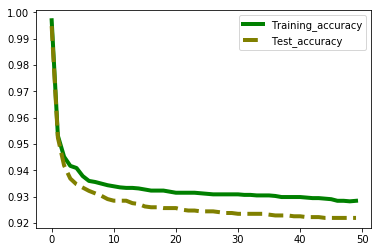

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_NB , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_NB, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [178]:
mushroom_test = pd.read_csv('test.csv')
mushroom_test = mushroom_test.iloc[:,1:24]

In [179]:
X_test = mushroom_test.drop('V1',axis =  1)
y_test = mushroom_test['V1']

In [180]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in X_test.columns:
    X_test[col] = labelencoder.fit_transform(X_test[col])

In [181]:
X_test=pd.get_dummies(X_test,columns=X_test.columns,drop_first=True)

In [183]:

y_pred_NB = clf.predict(X_test)

In [184]:
y_pred_NB

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [187]:
score_test_NB = accuracy_score(y_pred_NB,clf.predict(X_test))

In [188]:
score_test_NB

1.0

In [217]:
y_test = pd.DataFrame(y_test)

In [220]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in y_test.columns:
    y_test[col] = labelencoder.fit_transform(y_test[col])

In [93]:
#Decision Tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
score_train_DT = []
score_test_DT = []
factor = []
for i in range(4,65,4):
    clf_dt = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth = i)
    clf_dt = clf_dt.fit(X,Y)
    y_pred_DT = clf_dt.predict(X_test)
    factor.append(i)
    score_train_DT.append(accuracy_score(Y,clf_dt.predict(X)))
    score_test_DT.append(accuracy_score(y_test,clf_dt.predict(X_test)))
    
    
    
print("Predictions form the classifier:")
print(clf_dt.predict(X_test))

Predictions form the classifier:
['e' 'p' 'e' ... 'p' 'e' 'e']


In [94]:
df_DT = pd.DataFrame()
df_DT['Training_accuracy'] = score_train_DT
df_DT['Test_accuracy'] = score_test_DT
df_DT['K'] =factor

In [95]:
df_DT

,Training_accuracy,Test_accuracy,K
0,0.988995,0.985701,4
1,1.000000,1.000000,8
2,1.000000,1.000000,12
3,1.000000,1.000000,16
4,1.000000,1.000000,20
5,1.000000,1.000000,24
6,1.000000,1.000000,28
7,1.000000,1.000000,32
8,1.000000,1.000000,36
9,1.000000,1.000000,40


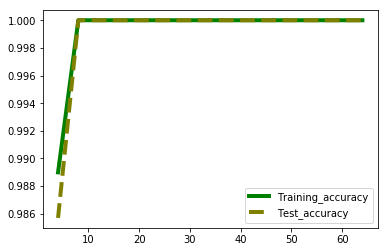

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( 'K', 'Training_accuracy', data=df_DT , markerfacecolor='blue', markersize=6, color='green', linewidth=4)
plt.plot( 'K', 'Test_accuracy', data=df_DT, marker='', color='olive', linewidth=4, linestyle='dashed')
plt.legend()

In [14]:
mushroom_test = pd.read_csv('test.csv')
mushroom_train = mushroom_train.iloc[:,1:24]
mushroom_test = mushroom_test.iloc[:,1:24]


In [16]:
X_test = mushroom_test.drop('V1',axis =  1)
y_test = mushroom_test['V1']
X = mushroom_train.drop('V1', axis=1)  
y = mushroom_train['V1'] 

In [18]:
##creating dummy variables

X=pd.get_dummies(X,columns=X.columns,drop_first=True)

X_test=pd.get_dummies(X_test,columns=X_test.columns,drop_first=True)


In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier()  
clf = DecisionTreeClassifier()
clf = clf.fit(X,y)


In [7]:
y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[263   0]
 [  0 228]]
             precision    recall  f1-score   support

          e       1.00      1.00      1.00       263
          p       1.00      1.00      1.00       228

avg / total       1.00      1.00      1.00       491



In [ ]:
 #Calculate the weighted entropy
Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

In [4]:

##creting dummy vars
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,V2_c,V2_f,V2_k,V2_s,V2_x,V3_g,V3_s,V3_y,V4_c,V4_e,...,V22_n,V22_s,V22_v,V22_y,V23_g,V23_l,V23_m,V23_p,V23_u,V23_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10) 

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
